#                          DATA ANALYSIS FOR EARTH SCIENCE

## ASSIGNMENT - I

### AMGOTH PAVAN KUMAR, SR: 23003

## Exploring Spatial Patterns and Temporal Variations using SVD

### Importing the file and Plotting the Perturbation of Atmospheric Pressure with respect to time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import Pillow

In [2]:
file = 'atm_pressure_dataset.h5'
data = h5py.File(file)['data']
data_arr = np.array(data)

def step(t):
    plt.imshow(data_arr[t], alpha = 0.8, cmap = 'coolwarm')
    plt.title('Perturbation of Atmospheric Presure')

interact(step, t = (0, 24, 1))

interactive(children=(IntSlider(value=12, description='t', max=24), Output()), _dom_classes=('widget-interact'…

<function __main__.step(t)>

TypeError: 'method' object is not subscriptable

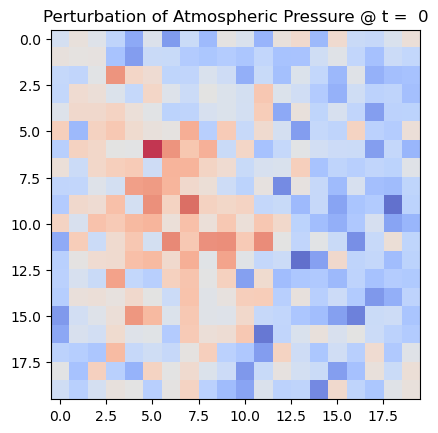

In [21]:
fig2, ax2 = plt.subplots()
t_values = np.arange(25)

def animate(t):
    ax2.clear()
    ax2.imshow(np.rot90(data_arr[t]), alpha=0.8, cmap='coolwarm')
    ax2.set_title('Perturbation of Atmospheric Pressure @ t =  {}'.format(t))
    
animation = FuncAnimation(fig2, animate, frames=t_values, interval=500, repeat=True)
animation.save('animated_atmospheric_pressure.gif', writer='pillow', fps = 2)
HTML(animation.to_jshtml)

###### * Plotted the given Atm_Pressure_dataset file with extension .h5 and Observed the Variation of Pressure over different time interval  (Temporal and Spatial observation)

### Calculating the SVD of the given Data

In [4]:
data_reshape = np.reshape(data_arr, (25, 400))

U, S, Vt = np.linalg.svd(data_reshape, full_matrices = False)

#### * Calculated the SVD of the data size (25, 20 ,20) by reshaping the size into (25, 400)

###### * Size of U, S & Vt:

In [9]:
print('Size of U', U.shape)
print('Size of S', S.shape)
print('Size of Vt', Vt.shape)

Size of U (25, 25)
Size of S (25,)
Size of Vt (25, 400)


### Plotting the Sigular Values of the given Data

Text(0, 0.5, 'Singular Value Magnitude')

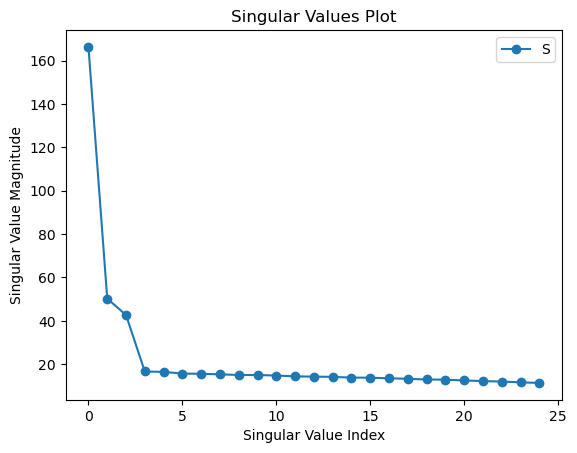

In [10]:
plt.plot(S, marker ='o')

plt.legend(['S'])
plt.title('Singular Values Plot')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value Magnitude')

###### * Plotted the Sigular Values by calculating the SVD and the S values are: 

In [11]:
np.array(S)

array([166.37219155,  50.27816563,  42.67007161,  16.63070528,
        16.44787926,  15.67289884,  15.5671382 ,  15.31038434,
        15.02260169,  14.99710229,  14.7765027 ,  14.37526601,
        14.27320976,  14.15208338,  13.81786306,  13.7712642 ,
        13.48704917,  13.25295253,  12.94045788,  12.849775  ,
        12.49964573,  12.19706116,  11.98993798,  11.61503044,
        11.3591572 ])

#### *From the above figure it shows that the most significant values lies in between 0 to 4 of significant value index*

### Plotting the Most Significant values

Text(0, 0.5, 'Singular Value Index')

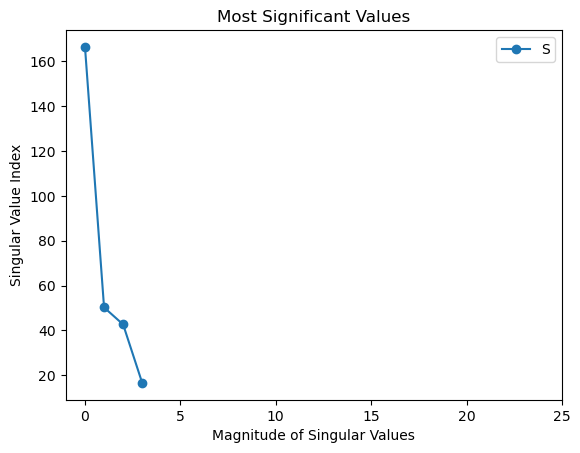

In [12]:
MSig_values = S[0:4]
plt.plot(MSig_values, marker = 'o')
plt.title('Most Significant Values')
plt.legend('S')
plt.xlim([-1, 25])
plt.xlabel('Magnitude of Singular Values')
plt.ylabel('Singular Value Index')

### Multiplying the Values of U, S and Vt to verify the results shows the actual shape

In [13]:
product = U @ np.diag(S) @ Vt
product.shape

(25, 400)

#### *The Product gives the flattened shape of the Original data set, to visualize the spatial pattern it's reshaped to a size (20, 20).*

### Visualizing the Significant Spatial and Temporal Patterns after computing SVD

### Spatial Pattern

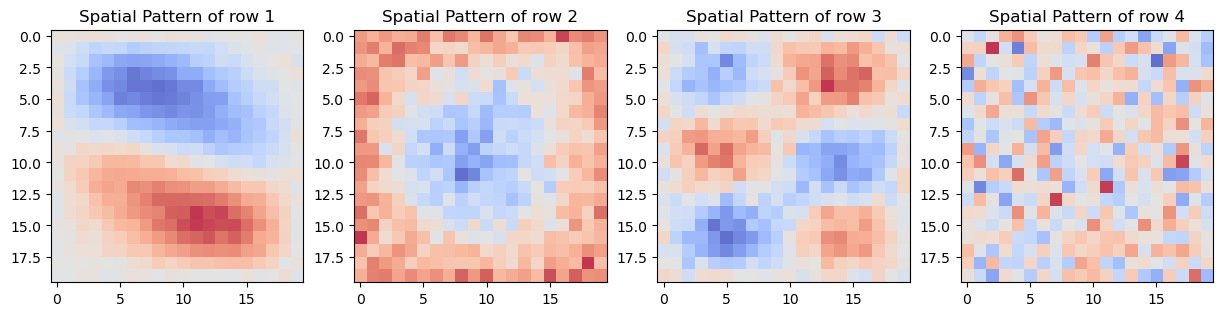

In [14]:
first_4_rows = Vt[:4, :]
fig, axes = plt.subplots(1,4, figsize = (15, 5))

for i in range(4):
    Vt_reshape = np.reshape(first_4_rows[i, :], (20, 20))
    axes[i].imshow(Vt_reshape, alpha = 0.8, cmap = 'coolwarm')
    axes[i].set_title(f'Spatial Pattern of row {i+1}')
plt.show()

#### *After visualizing the first 4 rows of the Vt, it shows the spatial distribution of pressure in the data.* 
###### *Each row of Vt represents a pressure value, and the reshaped matriices visually depict the spatial distribution of that pressure across the data.*

### Temporal Pattern

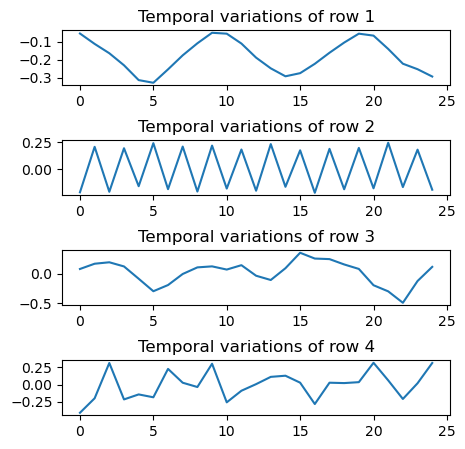

In [15]:
first_4_columns = U[:, :4]
fig, axes = plt.subplots(4, 1, figsize = (5, 5))

for j in range(4):
    axes[j].plot(first_4_columns[:, j])
    axes[j].set_title(f'Temporal variations of row {j+1}')
plt.subplots_adjust(hspace = 1)
plt.show()


#### *The columns of matrix U represents how different the pressure vary over the time.*
#### *Each column of U corresponds to a different temporal pattern.*
#### *From the above plot it shows that the first 3 patterns are most significant to visualize the variation of pressure over the time.*

## Implications of finding only S = 3 significant singular values

##### When only S =3 significant sigular values are significant, implies that the matrix has a rank of 3, meaning that the information contained in the matrix can be effectively captured by a 3-D subspace.

##### This has several implications and potential applications:
### Dimensionality Reduction : (Low-rank approximation)
##### Identifying only 3 significant singular values suggests that much of the variability in the data can be explained by a lower-dimension subspace. This can be exploited for dimensionility reduction, which is valuable in various fields such as data compression, feature extraction, and noise reduction.
### Physical Processes:
##### In this context, a low-rank matrix represent a simplified model that captures the essential dynamics of the system. This can help in understanding and predictimg behaviors with fewer variables, making the analysis more manageable.



In [17]:
U, S, VT = np.linalg.svd(data_reshape, full_matrices = False)
print(U.shape, S.shape, VT.shape)

(25, 25) (25,) (25, 400)


Enter the rank of the Slice = 3
Enter the Slice one = 0
Enter the Slicet two = 0
Enter the Slice three = 0


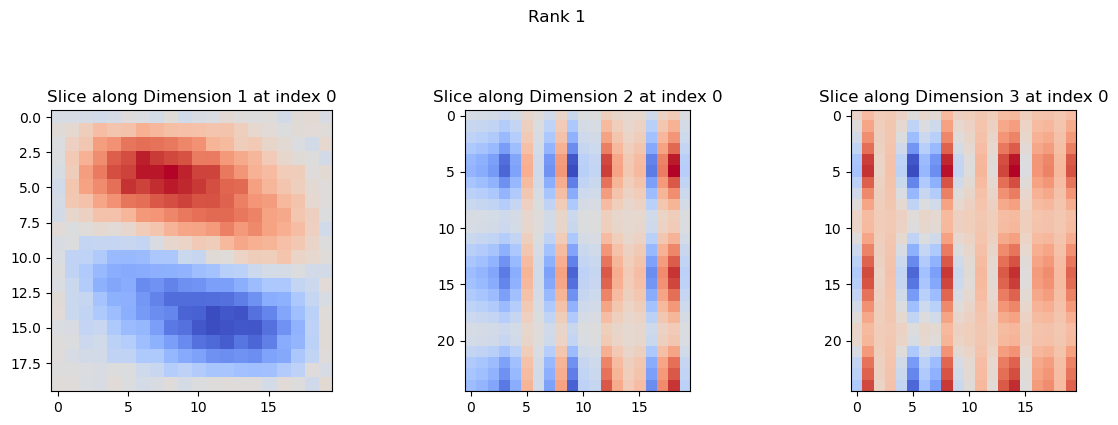

Enter the Slice one = 1
Enter the Slicet two = 1
Enter the Slice three = 1


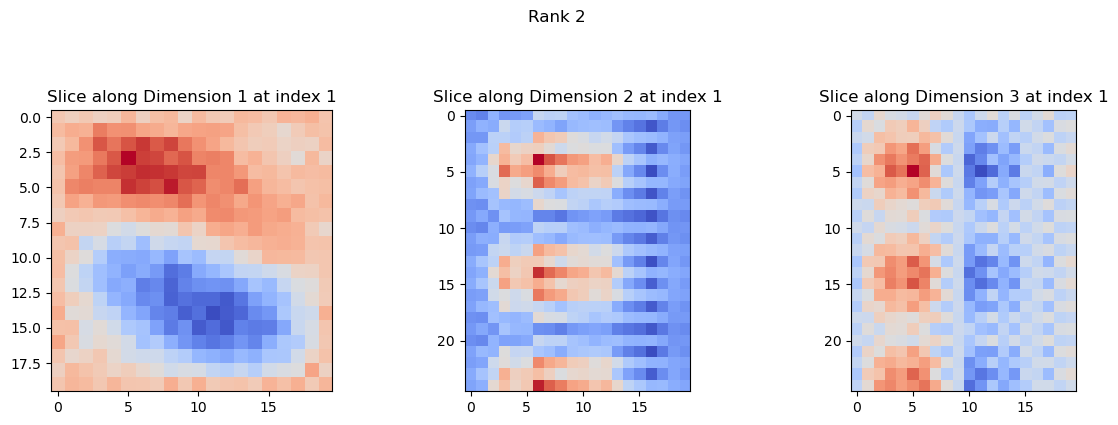

Enter the Slice one = 2
Enter the Slicet two = 2
Enter the Slice three = 2


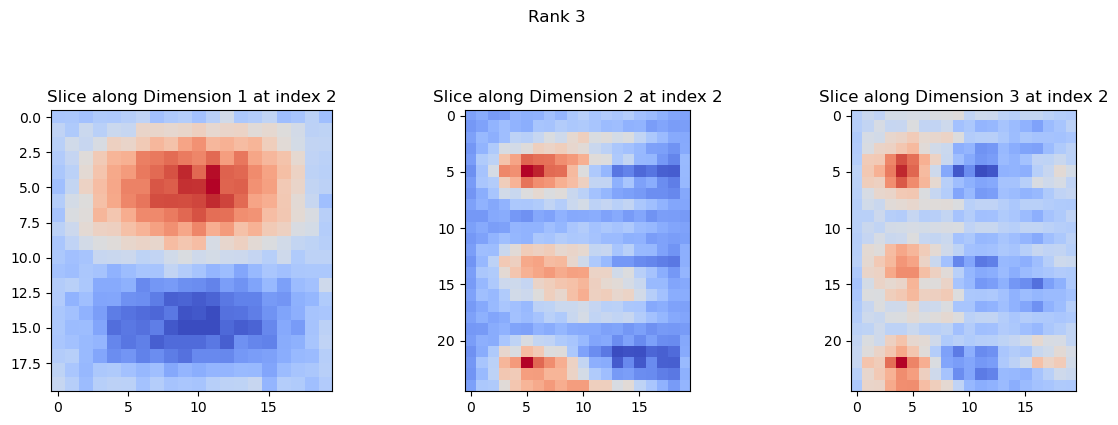

In [18]:
max_rank = int(input('Enter the rank of the Slice = '))

# Iterate over different ranks
for rank in range(1, max_rank + 1):
    low_r_aprr = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), VT[:rank, :]))
    mat_reshape = np.reshape(low_r_aprr, (25, 20, 20))

    s1 = int(input('Enter the Slice one = '))
    s2 = int(input('Enter the Slicet two = '))
    s3 = int(input('Enter the Slice three = '))

    plt.figure(figsize=(12, 4))

    # Visualize slices along different dimensions
    plt.subplot(1, 3, 1)
    plt.imshow(mat_reshape[s1, :, :], cmap='coolwarm')
    plt.title(f'Slice along Dimension 1 at index {s1}')

    plt.subplot(1, 3, 2)
    plt.imshow(mat_reshape[:, s2, :], cmap='coolwarm')
    plt.title(f'Slice along Dimension 2 at index {s2}')

    plt.subplot(1, 3, 3)
    plt.imshow(mat_reshape[:, :, s3], cmap='coolwarm')
    plt.title(f'Slice along Dimension 3 at index {s3}')

    plt.tight_layout()
    plt.suptitle(f'Rank {rank}', y = 1.05)
    plt.subplots_adjust(top=0.8, hspace =0.5)
    plt.show()

### As rank = 3 the image becomes more clear than rank = 1 and rank 2

###### Note: This is purely based on my understanding, provide suggestions after  reviewing it.
##### Thanking you sir